Principles of corporate Finance 

Chapter 2
Example 2.5
Calculating a mortgage amortization payments

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set variables

pv = 250000
r = 0.12
t = 30
ppy = 1


In [4]:
# calculate annuity factor

af = ((1/r) - (1/(r*((1+r)**(t*ppy)))))
print(af)


8.055183967667363


In [5]:
# Period payment is (pv/af)
pmt = pv/af
fv = pmt*t

In [6]:
per = pd.Series(range(1,(t*ppy)+1))

In [7]:
df = pd.DataFrame(index= per , columns=['pmt','paid','im','Blnc','ipaid','ppaid'])
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
df["pmt"] = pmt
df["paid"] = df["pmt"].cumsum()
df["im"] = fv
df['Blnc']= df["im"]-df["paid"]
df['per'] = per
df['ipaid'] = np.ipmt(r, per, (t*ppy), pv, when='end')*-1
df['ppaid'] = np.ppmt(r, per, (t*ppy), pv, when='end')*-1


         pmt       paid         im       Blnc     ipaid     ppaid   per
1  31,035.91  31,035.91 931,077.43 900,041.52 30,000.00  1,035.91  2.00
2  31,035.91  62,071.83 931,077.43 869,005.60 29,875.69  1,160.22  3.00
3  31,035.91  93,107.74 931,077.43 837,969.69 29,736.46  1,299.45  4.00
4  31,035.91 124,143.66 931,077.43 806,933.77 29,580.53  1,455.39  5.00
5  31,035.91 155,179.57 931,077.43 775,897.86 29,405.88  1,630.03  6.00
6  31,035.91 186,215.49 931,077.43 744,861.95 29,210.28  1,825.64  7.00
7  31,035.91 217,251.40 931,077.43 713,826.03 28,991.20  2,044.71  8.00
8  31,035.91 248,287.32 931,077.43 682,790.12 28,745.84  2,290.08  9.00
9  31,035.91 279,323.23 931,077.43 651,754.20 28,471.03  2,564.89 10.00
10 31,035.91 310,359.14 931,077.43 620,718.29 28,163.24  2,872.67 11.00
11 31,035.91 341,395.06 931,077.43 589,682.37 27,818.52  3,217.39 12.00
12 31,035.91 372,430.97 931,077.43 558,646.46 27,432.43  3,603.48 13.00
13 31,035.91 403,466.89 931,077.43 527,610.54 27,000.02  4,035.9

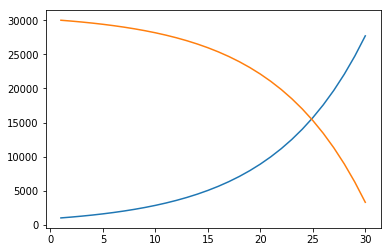

In [9]:
df['ppaid'].plot()
df['ipaid'].plot()
print(df)
plt.show()